In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import yfinance as yf
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [17]:
portfolio = pd.read_csv("data/Stock_History/closing.csv")
company = pd.read_csv("data/company_data.csv")

In [18]:
portfolio = portfolio.drop(['Date'],axis=1)

In [19]:
portfolio = portfolio.drop(['GEHC'],axis=1)
portfolio = portfolio.drop(['CEG'],axis=1)
portfolio = portfolio.drop(['OGN'],axis=1)
portfolio = portfolio.drop(['CARR'],axis=1)
portfolio = portfolio.drop(['OTIS'],axis=1)
portfolio = portfolio.drop(['WTW'],axis=1)

In [20]:
portfolio.isna().sum().sort_values(ascending = False)

A       0
NEM     0
NWL     0
NVR     0
NVDA    0
       ..
EPAM    0
EOG     0
ENPH    0
EMR     0
ZTS     0
Length: 497, dtype: int64

In [21]:
daily_return = portfolio.pct_change(1)

In [22]:
daily_return = daily_return.dropna()

In [23]:
annual_mean_return = daily_return.mean() * 252
annual_return_var = daily_return.var() * 252
annual_risk = daily_return.std() * math.sqrt(252)
stock_volatility = daily_return.std()

In [24]:
data_finacial = pd.DataFrame()
data_finacial['annual returns'] = annual_mean_return
data_finacial['annual risk'] = annual_risk
data_finacial['stock symbole'] = data_finacial.index
data_finacial['Ratio'] = data_finacial['annual returns'] / data_finacial['annual risk']

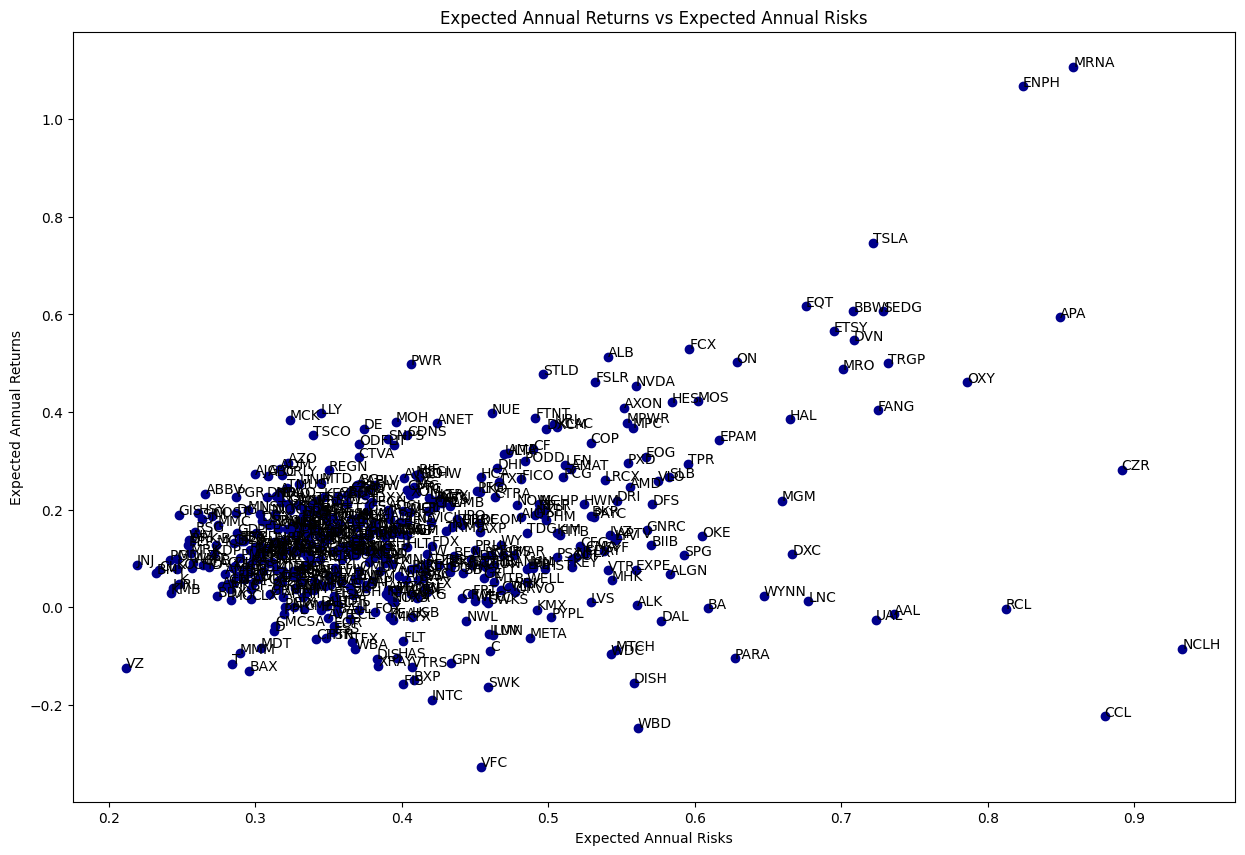

In [25]:
fig, ax = plt.subplots(figsize=(15,10)) 
plt.title('Expected Annual Returns vs Expected Annual Risks') 
ax.scatter(data_finacial[ 'annual risk'] , data_finacial['annual returns'], c = 'DarkBlue') 
ax.set_xlabel('Expected Annual Risks')
ax.set_ylabel('Expected Annual Returns')


for idx, row in data_finacial. iterrows():
    ax.annotate(row['stock symbole'], (row['annual risk'], row['annual returns']), c = 'black')

plt.show()

f:\anaconda\envs\Project\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


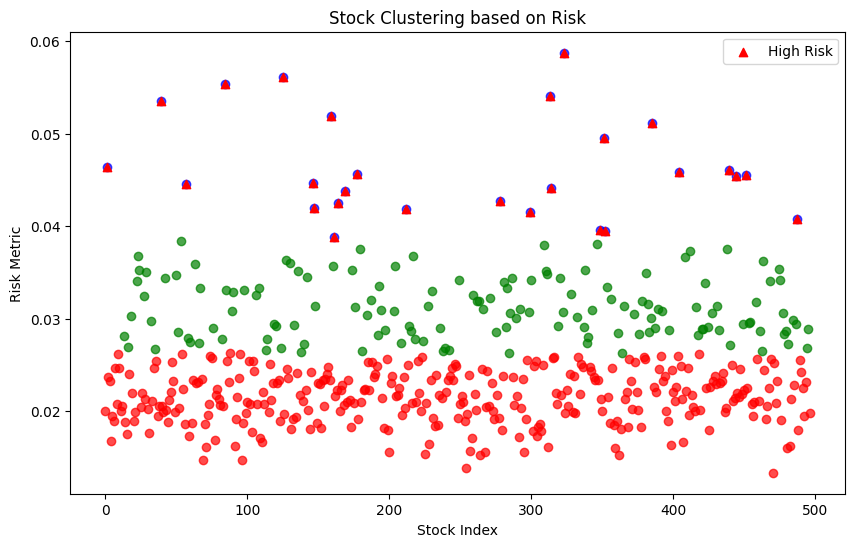

High-risk stocks:
AAL
APA
BBWI
CCL
CZR
DVN
DXC
ENPH
EPAM
EQT
ETSY
FANG
HAL
LNC
MGM
MRNA
MRO
NCLH
ON
OXY
PARA
RCL
SEDG
TRGP
TSLA
UAL
WYNN


In [28]:
df = portfolio
# Extract the closing prices
closing_prices = portfolio

stock_symbols = list(df.columns.values)

# Calculate risk metric (example: standard deviation of daily returns)
risk_metric = closing_prices.pct_change().std()


scaler = MinMaxScaler()
normalized_risk = scaler.fit_transform(risk_metric.values.reshape(-1, 1))

# Apply k-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(normalized_risk)

# Get the cluster labels for each stock
cluster_labels = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']  # Colors for the clusters

for i, label in enumerate(cluster_labels):
    plt.scatter(i, risk_metric[i], color=colors[label], alpha=0.7)

# Highlight the high-risk stocks
high_risk_stocks = [stock_symbols[i] for i, label in enumerate(cluster_labels) if label == 2]
high_risk_indices = [i for i, label in enumerate(cluster_labels) if label == 2]

plt.scatter(high_risk_indices, risk_metric[high_risk_indices], color='red', marker='^', label='High Risk')

# Add labels and title
plt.xlabel('Stock Index')
plt.ylabel('Risk Metric')
plt.title('Stock Clustering based on Risk')

# Add legend
plt.legend()

# Show the plot
plt.show()

# Print the high-risk stocks
print("High-risk stocks:")
for stock in high_risk_stocks:
    print(stock)